<a href="https://colab.research.google.com/github/dey-hritam/ML-Projects/blob/main/Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans



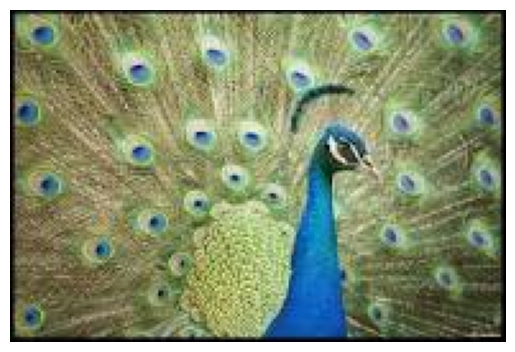

In [54]:
img=plt.imread('/content/images.jpeg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [55]:
type(img)

numpy.ndarray

In [56]:
print(img.shape)
print(img.size)

(130, 194, 3)
75660


In [57]:
w,h,d=img.shape
image_array=img.reshape(w*h,d)
print(image_array.shape)
#normalize int the range of (0,1)
image_array=image_array/255

(25220, 3)


In [58]:
from sklearn.utils import shuffle

image_array_sample=shuffle(image_array,random_state=1)[:1000]

image_array_sample.size

3000

In [59]:
kmeans=KMeans(n_clusters=6,random_state=1)

kmeans.fit(image_array_sample)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=1)

In [60]:
labels=kmeans.predict(image_array)

labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [61]:
c=kmeans.cluster_centers_
print(c)

[[0.36342997 0.38331926 0.24323107]
 [0.73797074 0.78814192 0.62371615]
 [0.11963266 0.14023331 0.09123852]
 [0.10085999 0.4130719  0.65786034]
 [0.61517845 0.65072648 0.4680773 ]
 [0.50467932 0.52836497 0.35450355]]


In [62]:
#recreate original image according to labels and each pixels
def recreate_iamge(c,w,h,labels):
  image=np.zeros((w,h,d))
  label_idx=0
  for i in range(w):
    for j in range(h):
      image[i][j]=c[labels[label_idx]]
      label_idx+=1
  return image


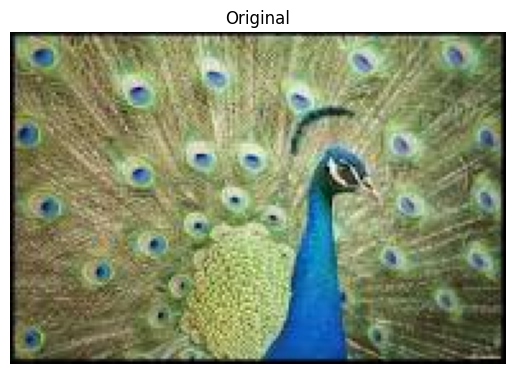

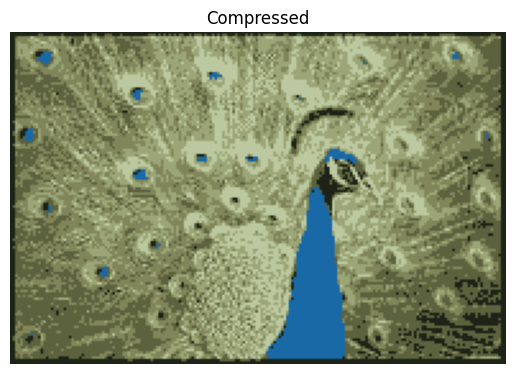

In [63]:
#Original Image
plt.figure(1)
plt.title('Original')
plt.axis('off')
plt.imshow(img)
plt.show()

#Compressed image
plt.figure(2)
plt.axis('off')
plt.title('Compressed')
plt.imshow(recreate_iamge(c,w,h,labels))
plt.show()


